In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Prey-Predator Problem

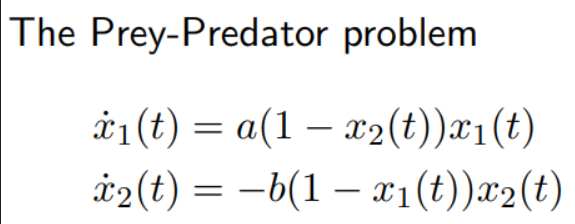

Non-stiff:

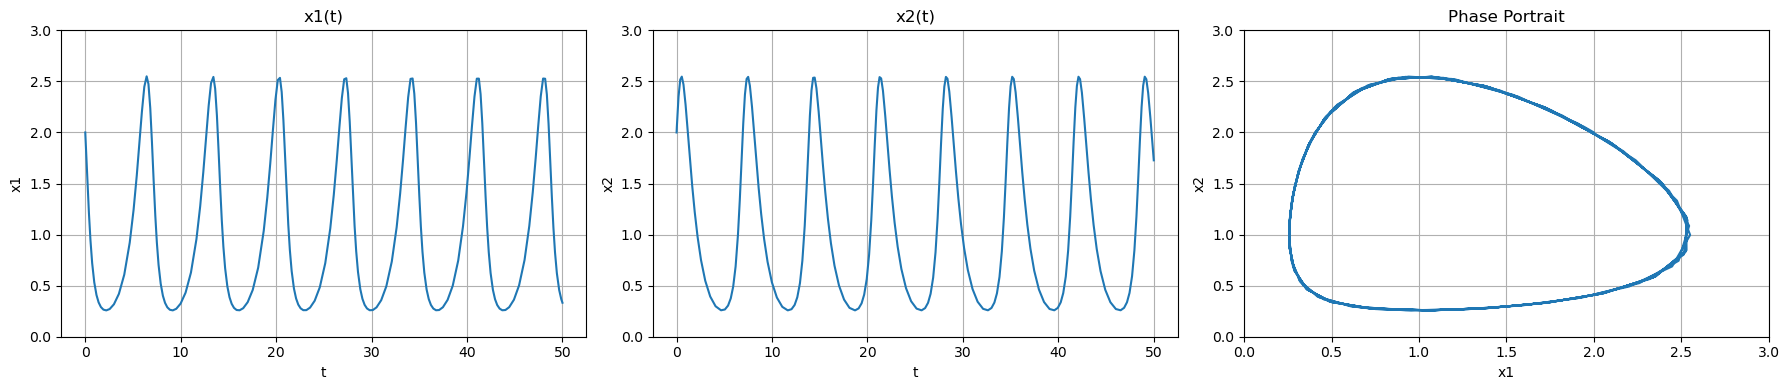

In [8]:
def prey_predator(t, x, a, b):
    xdot = np.zeros(2)
    xdot[0] = a * (1 - x[1]) * x[0]
    xdot[1] = -b * (1 - x[0]) * x[1]
    return xdot

a = 1.0
b = 1.0
x0 = [2.0, 2.0]
t_span = (0.0, 50.0)

solution = solve_ivp(
    fun=lambda t, x: prey_predator(t, x, a, b),
    t_span=t_span,
    y0=x0,
    method="RK45",   # ode45 equivalent
    rtol=1e-6,
    atol=1e-6
)

T = solution.t
X = solution.y.T

# Extract states
x1 = X[:, 0]
x2 = X[:, 1]

# Create 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Plot x1(t)
axes[0].plot(T, x1)
axes[0].set_ylim(0, 3)
axes[0].set_xlabel("t")
axes[0].set_ylabel("x1")
axes[0].set_title("x1(t)")
axes[0].grid(True)

# Plot x2(t)
axes[1].plot(T, x2)
axes[1].set_ylim(0, 3)
axes[1].set_xlabel("t")
axes[1].set_ylabel("x2")
axes[1].set_title("x2(t)")
axes[1].grid(True)

# Plot phase portrait x1 vs x2
axes[2].plot(x1, x2)
axes[2].set_xlim(0, 3)
axes[2].set_ylim(0, 3)
axes[2].set_xlabel("x1")
axes[2].set_ylabel("x2")
axes[2].set_title("Phase Portrait")
axes[2].grid(True)

plt.tight_layout()
plt.show()

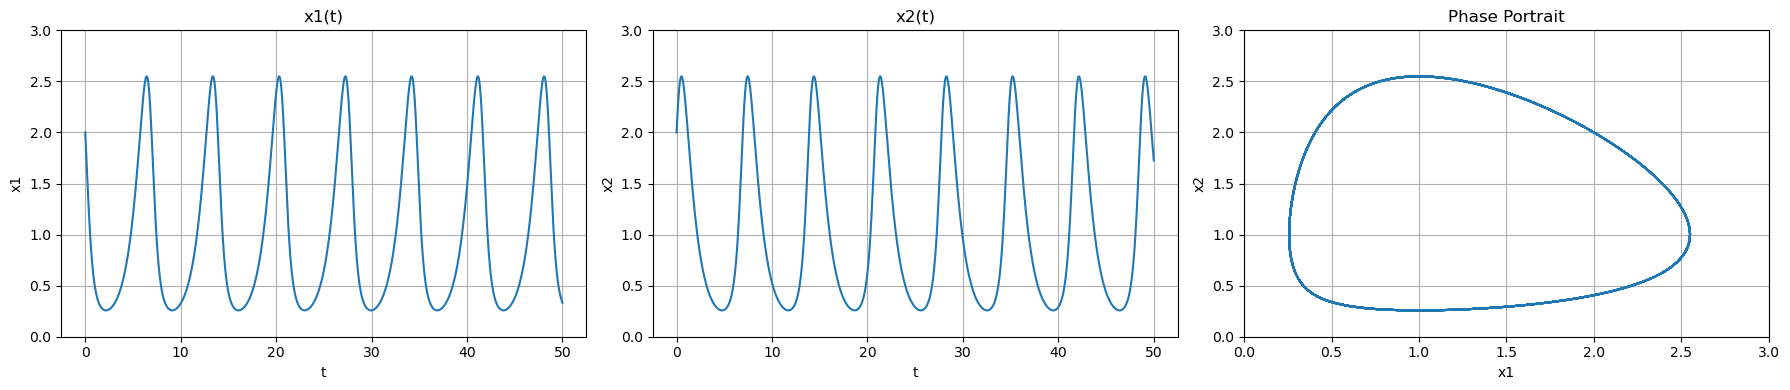

In [10]:
def jac_prey_predator(t, x, a, b):
    return np.array([
        [a * (1 - x[1]),      -a * x[0]],
        [b * x[1],      -b * (1 - x[0])]
    ])

solution = solve_ivp(
    fun=lambda t, x: prey_predator(t, x, a, b),
    t_span=(0.0, 50.0),
    y0=x0,
    method="BDF",                 # ode15s analogue
    jac=lambda t, x: jac_prey_predator(t, x, a, b),
    rtol=1e-6,
    atol=1e-6
)

T = solution.t
X = solution.y.T

# Create 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Extract states
x1 = X[:, 0]
x2 = X[:, 1]

# Plot x1(t)
axes[0].plot(T, x1)
axes[0].set_ylim(0, 3)
axes[0].set_xlabel("t")
axes[0].set_ylabel("x1")
axes[0].set_title("x1(t)")
axes[0].grid(True)

# Plot x2(t)
axes[1].plot(T, x2)
axes[1].set_ylim(0, 3)
axes[1].set_xlabel("t")
axes[1].set_ylabel("x2")
axes[1].set_title("x2(t)")
axes[1].grid(True)

# Plot phase portrait x1 vs x2
axes[2].plot(x1, x2)
axes[2].set_xlim(0, 3)
axes[2].set_ylim(0, 3)
axes[2].set_xlabel("x1")
axes[2].set_ylabel("x2")
axes[2].set_title("Phase Portrait")
axes[2].grid(True)

plt.tight_layout()
plt.show()

### Adaptation using ODE system equivalent to DDDEs

In [ ]:
m = 2
a = 1
C = np.ones(m+1)/(m+1)

def f(x,z):
    return x+z

def ODE(t,y):
    y[1] = C @ y[2:]
    ydot = np.zeros(m+3)
    ydot[0] = f(y[0],y[1])
    A = get_A(m)
    B = get_B(m,a)
    ydot[2:] = a * A @ y[2:] + B * y[0] # Zdot = ydot[2:] and Z = y[2:]
    return ydot

def get_B(m,a):
    B = np.zeros(m+1)
    B[0] = a
    return B

def get_A(m):
    d = -1 * np.ones(m+1)
    l = np.ones(m)
    return np.diag(d)+np.diag(l,-1)
